# Previsão do estado de evolução de pacientes com covid com aplicação de algoritmos classificatórios de machine learning
O objetivo é prever quais pacientes internados serão curados e quais pacientes falecerão por covid, baseado nas informações de pacientes que já evoluiram para o estado de curado ou óbito.

* 1 - 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)
pd.set_option('display.width', 100)

In [3]:
df = pd.read_csv('MICRODADOS.csv', error_bad_lines=False, sep=';', encoding='latin-1')  # lê o arquivo csv

df1 = pd.read_csv('MICRODADOS (2).csv', error_bad_lines=False, sep=';', encoding='latin-1')  # lê o arquivo csv
df1.head()

,Data,Classificacao,Evolucao,CriterioConfirmacao,StatusNotificacao,Municipio,Bairro,FaixaEtaria,Sexo,RacaCor,Escolaridade,Febre,DificuldadeRespiratoria,Tosse,Coriza,DorGarganta,Diarreia,Cefaleia,ComorbidadePulmao,ComorbidadeCardio,ComorbidadeRenal,ComorbidadeDiabetes,ComorbidadeTabagismo,ComorbidadeObesidade,FicouInternado,ViagemBrasil,ViagemInternacional
0,2020-06-01,Confirmados,-,Laboratorial,Em Aberto,TEIXEIRA DE FREITAS,NaN,50 a 59 anos,F,Branca,Analfabeto,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,-,Não,Não
1,2020-05-30,Confirmados,-,Laboratorial,Em Aberto,AFONSO CLAUDIO,VILA NOVA,0 a 4 anos,M,Branca,Analfabeto,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não
2,2020-05-06,Confirmados,Cura,Laboratorial,Encerrado,AFONSO CLAUDIO,VILA NOVA,80 a 89 anos,F,Branca,Analfabeto,Não,Não,Sim,Não,Não,Não,Não,Não,Sim,Não,Não,Não,Não,Não,Não,Não
3,2020-06-09,Confirmados,-,Laboratorial,Em Aberto,AFONSO CLAUDIO,ALEGORIA,60 a 69 anos,F,Branca,Analfabeto,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,Sim,-
4,2020-05-29,Confirmados,-,Laboratorial,Em Aberto,AGUA DOCE DO NORTE,SANTO AGOSTINHO,40 a 49 anos,M,Branca,Analfabeto,Não,Sim,Sim,Não,Não,Sim,Não,Não,Sim,Sim,Sim,Não,Não,Sim,Não,Não


In [4]:
df.Evolucao.value_counts()

Cura                       10535
-                           6688
Ignorado                    1562
Óbito pelo COVID-19          832
Óbito por outras causas        2
Name: Evolucao, dtype: int64

## **1 - Definindo as variaveis importantes para a previsão**
#### **1.1 - Tratamento dos dados**

In [5]:
dfmodel = df1.drop(df1[df1.Evolucao == 'Ignorado'].index) 
dfmodel = dfmodel.drop(dfmodel[dfmodel.Evolucao == '-'].index) 
dfmodel = dfmodel.drop(dfmodel[dfmodel.Evolucao == 'Óbito por outras causas'].index) 
dfmodel = dfmodel.drop(['Classificacao', 'Municipio', 'Escolaridade', 'Data', 'StatusNotificacao', 'Bairro', 'ViagemBrasil', 'ViagemInternacional'], axis = 1)
dfmodel = dfmodel.drop(dfmodel[dfmodel.CriterioConfirmacao == 'Clinico'].index) 
dfmodel = dfmodel.drop(dfmodel[dfmodel.Sexo == 'I'].index)

dfmodel = dfmodel.replace(to_replace = ['Indigena', 'Ignorado', '-', 'Sim','Não', 'Cura', 'Óbito pelo COVID-19', 'M', 'F', '0 a 4 anos', '05 a 9 anos', '10 a 19 anos', '20 a 29 anos', '30 a 39 anos', '40 a 49 anos', '50 a 59 anos', '60 a 69 anos', '70 a 79 anos', '80 a 89 anos', '90 anos ou mais', 'Branca', 'Preta', 'Amarela', 'Parda', 'Clinico Epdemiologico', 'Laboratorial'],value = ['5', '4','99','1','0', '0', '1', '1', '0', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '0', '1', '2', '3', '0', '1']) 
# EVOLUÇÃO sim=1, não=0 
# CRITÉRIO CONFIRMAÇÃO Clinico Epdemiologico=0, Laboratorial=1, 
# SINTOMAS cura=1, obito=0, masculino=1, feminino=0
# FAIXA ETARIA '0 a 4 anos'=0, '05 a 9 anos'=1, '10 a 19 anos'=2, '20 a 29 anos'=3, '30 a 39 anos'=4, '40 a 49 anos'=5, '50 a 59 anos'=6, '60 a 69 anos'=7, '70 a 79 anos'=8, '80 a 89 anos'=9, '90 anos ou mais'= '10'
# RAÇA COR branca=0, preta=1, amarela=2, parda=3, ignorado=4, indigena=5

dfmodel.head()

,Evolucao,CriterioConfirmacao,FaixaEtaria,Sexo,RacaCor,Febre,DificuldadeRespiratoria,Tosse,Coriza,DorGarganta,Diarreia,Cefaleia,ComorbidadePulmao,ComorbidadeCardio,ComorbidadeRenal,ComorbidadeDiabetes,ComorbidadeTabagismo,ComorbidadeObesidade,FicouInternado
2,0,1,9,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0
6,0,1,6,1,0,1,0,0,1,1,0,1,0,0,0,0,0,0,0
7,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0
9,0,0,0,1,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0
10,0,1,8,0,0,1,1,1,1,0,0,1,0,1,0,0,0,0,1


In [11]:
#from pandas_profiling import ProfileReport
#profile = ProfileReport(dfmodel, title='Profiling Covid', html={'style':{'full_width':True}})
#profile

## **2 - Ensinando a Máquina**
#### **2.1 - Repartindo os dados do modelo em treino e teste**

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
X = dfmodel.drop(['Evolucao'], axis=1)
y = dfmodel['Evolucao']

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=5)

In [15]:
print ('X_train: numero de linhas e colunas: {}'.format(X_train.shape))
print ('X_test: numero de linhas e colunas: {}'.format(X_test.shape))
print ('y_train: numero de linhas e colunas: {}'.format(y_train.shape))
print ('y_test: numero de linhas e colunas: {}'.format(y_test.shape))

X_train: numero de linhas e colunas: (10218, 18)
X_test: numero de linhas e colunas: (2555, 18)
y_train: numero de linhas e colunas: (10218,)
y_test: numero de linhas e colunas: (2555,)


#### **2.2 - Treinando e testando o modelo**

##### **2.2.1 - Decision tree**

In [16]:
from sklearn.tree import DecisionTreeClassifier

decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)

Y_pred = decision_tree.predict(X_test)

acc_decision_tree = round(decision_tree.score(X_train, y_train) * 100, 2)
print(round(acc_decision_tree,2,), "%")

99.16 %


In [17]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(decision_tree, X_train, y_train, cv=10, scoring = "accuracy")

print("Score:", scores)
print("Média:", scores.mean())
print("Desvio Padrão:", scores.std())

Score: [0.92074364 0.92465753 0.93933464 0.9148728  0.9148728  0.9109589
 0.92074364 0.92367906 0.91380999 0.91576885]
Média: 0.9199441857968955
Desvio Padrão: 0.00775027618957809


##### **2.2.2 - Random forest**

In [27]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
parametros = {'min_samples_leaf':[1,10],'min_samples_split':[2,10],'n_estimators':[100,250,500,750]}
rf = RandomForestClassifier()
grid = GridSearchCV(rf, parametros)
grid.fit(X_train, y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              ra

In [28]:
grid.best_params_

{'min_samples_leaf': 10, 'min_samples_split': 10, 'n_estimators': 500}

In [29]:
from sklearn.metrics import mean_squared_error

In [30]:
rf_best = grid.best_estimator_
resultado_final = rf_best.predict(X_test)
mean_squared_error(y_test, resultado_final)

0.059099804305283755

In [31]:
rf_best.score(X_test, y_test)

0.9409001956947163

In [32]:
rf_best.score(X_test, y_test)
acc_random_forest = round(rf_best.score(X_test, y_test) * 100, 2)
print(round(acc_random_forest,2,), "%")

94.09 %


##### **2.2 extra - Salvando o modelo para o deploy**

In [21]:
from sklearn.externals import joblib

In [22]:
joblib.dump(decision_tree, 'model.pkl')

['model.pkl']

In [25]:
model = joblib.load('model.pkl')

In [35]:
teste = np.array([[1,1,1,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1]])
model.predict(teste)

array(['0'], dtype=object)

In [36]:
model.predict_proba(teste)

array([[1., 0.]])

#### **2.3 - Testando previsão de quais foram os mortos em São Mateus**

In [367]:
samaCovid = df1.drop(df1[df1.Evolucao == 'Ignorado'].index) 
samaCovid = samaCovid.drop(samaCovid[samaCovid.Municipio != 'SAO MATEUS'].index) 
samaCovid = samaCovid.drop(samaCovid[samaCovid.Evolucao == '-'].index) 
samaCovid = samaCovid.drop(samaCovid[samaCovid.Evolucao == 'Óbito por outras causas'].index) 
samaCovid = samaCovid.drop(['Classificacao', 'Municipio', 'Escolaridade', 'Data', 'StatusNotificacao', 'Municipio', 'Bairro', 'ViagemBrasil', 'ViagemInternacional'], axis = 1)
samaCovid = samaCovid.drop(samaCovid[samaCovid.CriterioConfirmacao == 'Clinico'].index) 
samaCovid = samaCovid.drop(samaCovid[samaCovid.Sexo == 'I'].index)

samaCovid = samaCovid.replace(to_replace = ['Indigena', 'Ignorado', '-', 'Sim','Não', 'Cura', 'Óbito pelo COVID-19', 'M', 'F', '0 a 4 anos', '05 a 9 anos', '10 a 19 anos', '20 a 29 anos', '30 a 39 anos', '40 a 49 anos', '50 a 59 anos', '60 a 69 anos', '70 a 79 anos', '80 a 89 anos', '90 anos ou mais', 'Branca', 'Preta', 'Amarela', 'Parda', 'Clinico Epdemiologico', 'Laboratorial'],value = ['5', '4','99','1','0', '0', '1', '1', '0', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '0', '1', '2', '3', '0', '1']) 
# EVOLUÇÃO sim=1, não=0 
# Criterio Confirmação Clinico Epdemiologico=0, Laboratorial=1
# SINTOMAS cura=1, obito=0, masculino=1, feminino=0
# FAIXA ETARIA '0 a 4 anos'=0, '05 a 9 anos'=1, '10 a 19 anos'=2, '20 a 29 anos'=3, '30 a 39 anos'=4, '40 a 49 anos'=5, '50 a 59 anos'=6, '60 a 69 anos'=7, '70 a 79 anos'=8, '80 a 89 anos'=9, '90 anos ou mais'= '10'
# RAÇA COR branca=0, preta=1, amarela=2, parda=3
#df1.head(10)
#SamaCovid = SamaCovid.reset_index()

samaCovid = samaCovid.reset_index()
samaCovid = samaCovid.drop(['index'], axis=1)
samaCovid

,Evolucao,CriterioConfirmacao,FaixaEtaria,Sexo,RacaCor,Febre,DificuldadeRespiratoria,Tosse,Coriza,DorGarganta,Diarreia,Cefaleia,ComorbidadePulmao,ComorbidadeCardio,ComorbidadeRenal,ComorbidadeDiabetes,ComorbidadeTabagismo,ComorbidadeObesidade,FicouInternado
0,0,0,0,1,0,1,0,1,1,1,1,0,0,0,0,0,0,0,0
1,1,1,9,0,1,0,1,1,0,0,0,0,0,1,0,1,0,0,1
2,0,1,9,0,2,1,1,1,1,0,0,1,0,1,0,0,0,0,0
3,0,1,0,1,3,0,0,1,1,1,0,0,0,0,0,0,0,0,0
4,0,1,7,0,4,1,0,1,0,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
189,0,1,5,0,0,1,0,1,0,0,0,1,0,1,0,1,0,0,0
190,0,1,4,1,0,1,1,1,0,0,0,1,0,0,0,0,0,0,99
191,0,1,8,0,0,1,0,1,0,0,0,0,0,1,0,1,0,0,1
192,0,1,4,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0


In [368]:
X_prev = samaCovid.drop(['Evolucao'], axis=1)

rst = decision_tree.predict(X_prev)

rst

array(['0', '1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',
       '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',
       '0', '0', '1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',
       '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',
       '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '0',
       '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',
       '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',
       '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',
       '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',
       '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',
       '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',
       '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',
       '0', '0', '0', '0', '0', '0', '0', '1', '0', '0', '0', '0', '1',
       '1', '0', '0', '0', '1', '0', '0', '0', '0', '0', '0', '0

In [369]:
samaCovidPred = pd.DataFrame(rst)
samaCovidPred = samaCovidPred.rename(columns={0: 'Prev'})
samaCovidPred.head()

,Prev
0,0
1,1
2,0
3,0
4,0


In [370]:
samaCovidPrev = pd.concat([samaCovid, samaCovidPred], axis=1)
samaCovidPrev = samaCovidPrev[['Evolucao', 'Prev', 'FicouInternado', 'CriterioConfirmacao', 'FaixaEtaria', 'Sexo', 'RacaCor', 'Febre', 'DificuldadeRespiratoria', 'Tosse', 'Coriza', 'DorGarganta', 'Diarreia', 'Cefaleia', 'ComorbidadePulmao', 'ComorbidadeCardio', 'ComorbidadeRenal', 'ComorbidadeDiabetes', 'ComorbidadeTabagismo', 'ComorbidadeObesidade']]

results = samaCovidPrev.sort_values(by ='Prev', ascending=False ) 
results.head(12)

,Evolucao,Prev,FicouInternado,CriterioConfirmacao,FaixaEtaria,Sexo,RacaCor,Febre,DificuldadeRespiratoria,Tosse,Coriza,DorGarganta,Diarreia,Cefaleia,ComorbidadePulmao,ComorbidadeCardio,ComorbidadeRenal,ComorbidadeDiabetes,ComorbidadeTabagismo,ComorbidadeObesidade
1,1,1,1,1,9,0,1,0,1,1,0,0,0,0,0,1,0,1,0,0
182,1,1,1,1,9,0,2,0,1,0,0,0,0,0,0,0,0,0,0,0
63,0,1,0,1,6,1,2,1,1,1,0,0,0,1,0,1,0,1,0,1
163,1,1,1,1,9,1,4,0,0,1,0,0,0,0,0,1,0,0,1,0
28,1,1,1,1,8,0,3,1,1,0,0,0,0,0,0,0,0,0,0,0
169,1,1,1,1,4,1,4,1,1,0,0,0,0,1,99,99,99,99,99,1
173,0,1,0,1,6,1,3,1,1,1,0,1,0,1,99,1,0,99,0,0
168,1,1,1,1,6,0,4,0,1,0,0,0,0,0,0,0,0,0,0,0
106,0,0,0,1,5,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0
107,0,0,0,1,4,0,0,0,0,0,1,1,1,1,1,0,0,0,0,0


In [371]:
results['counts'] = results['Evolucao'] + results['Prev'] 
#results
results['counts'].value_counts()

00    186
11      6
01      2
Name: counts, dtype: int64

In [372]:
100/194*192

98.96907216494844

##### ***Podemos ver aqui que o algoritmo acertou 186 pacientes vivos e 6 pacientes mortos. Por outro lado, julgou 2 pacientes vivos como mortos.***
###### Acertos: 192
###### Erros: 2
###### Acurácia: 98.96%

#### **2.4 - Testando previsão de quais foram os mortos em Linhares**

In [375]:
linhaCovid = df1.drop(df1[df1.Evolucao == 'Ignorado'].index) 
linhaCovid = linhaCovid.drop(linhaCovid[linhaCovid.Municipio != 'LINHARES'].index) 
linhaCovid = linhaCovid.drop(linhaCovid[linhaCovid.Evolucao == '-'].index) 
linhaCovid = linhaCovid.drop(linhaCovid[linhaCovid.Evolucao == 'Óbito por outras causas'].index) 
linhaCovid = linhaCovid.drop(['Classificacao', 'Municipio', 'Escolaridade', 'Data', 'StatusNotificacao', 'Municipio', 'Bairro', 'ViagemBrasil', 'ViagemInternacional'], axis = 1)
linhaCovid = linhaCovid.drop(linhaCovid[linhaCovid.CriterioConfirmacao == 'Clinico'].index) 
linhaCovid = linhaCovid.drop(linhaCovid[linhaCovid.Sexo == 'I'].index)

linhaCovid = linhaCovid.replace(to_replace = ['Indigena', 'Ignorado', '-', 'Sim','Não', 'Cura', 'Óbito pelo COVID-19', 'M', 'F', '0 a 4 anos', '05 a 9 anos', '10 a 19 anos', '20 a 29 anos', '30 a 39 anos', '40 a 49 anos', '50 a 59 anos', '60 a 69 anos', '70 a 79 anos', '80 a 89 anos', '90 anos ou mais', 'Branca', 'Preta', 'Amarela', 'Parda', 'Clinico Epdemiologico', 'Laboratorial'],value = ['5', '4','99','1','0', '0', '1', '1', '0', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '0', '1', '2', '3', '0', '1']) 
# EVOLUÇÃO sim=1, não=0 
# Criterio Confirmação Clinico Epdemiologico=0, Laboratorial=1
# SINTOMAS cura=1, obito=0, masculino=1, feminino=0
# FAIXA ETARIA '0 a 4 anos'=0, '05 a 9 anos'=1, '10 a 19 anos'=2, '20 a 29 anos'=3, '30 a 39 anos'=4, '40 a 49 anos'=5, '50 a 59 anos'=6, '60 a 69 anos'=7, '70 a 79 anos'=8, '80 a 89 anos'=9, '90 anos ou mais'= '10'
# RAÇA COR branca=0, preta=1, amarela=2, parda=3
#df1.head(10)
#SamaCovid = SamaCovid.reset_index()

linhaCovid = linhaCovid.reset_index()
linhaCovid = linhaCovid.drop(['index'], axis=1)
linhaCovid.head(10)

,Evolucao,CriterioConfirmacao,FaixaEtaria,Sexo,RacaCor,Febre,DificuldadeRespiratoria,Tosse,Coriza,DorGarganta,Diarreia,Cefaleia,ComorbidadePulmao,ComorbidadeCardio,ComorbidadeRenal,ComorbidadeDiabetes,ComorbidadeTabagismo,ComorbidadeObesidade,FicouInternado
0,1,1,9,0,0,1,1,0,0,0,1,0,1,0,0,0,0,0,1
1,1,1,9,1,2,1,1,1,0,0,1,0,0,1,0,1,0,1,1
2,0,1,0,1,3,1,0,1,1,0,0,0,0,0,0,0,0,0,0
3,1,1,8,0,4,1,1,1,0,0,0,1,1,0,0,1,0,0,1
4,0,1,5,0,3,1,0,1,0,0,0,1,0,1,0,0,0,0,0
5,0,1,8,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,0,1,6,0,2,0,1,1,1,0,0,0,1,0,0,0,0,0,0
7,0,1,5,0,2,1,0,1,0,1,0,0,0,0,0,0,0,0,0
8,1,1,9,1,0,1,1,1,1,1,0,0,0,1,1,1,0,0,1
9,1,1,8,0,0,1,1,1,0,0,0,0,99,1,1,0,0,99,1


In [376]:
X_prev = linhaCovid.drop(['Evolucao'], axis=1)

rst = decision_tree.predict(X_prev)

In [377]:
linhaCovidPred = pd.DataFrame(rst)
linhaCovidPred = linhaCovidPred.rename(columns={0: 'Prev'})

In [378]:
linhaCovidPrev = pd.concat([linhaCovid, linhaCovidPred], axis=1)
linhaCovidPrev = linhaCovidPrev[['Evolucao', 'Prev', 'FicouInternado', 'CriterioConfirmacao', 'FaixaEtaria', 'Sexo', 'RacaCor', 'Febre', 'DificuldadeRespiratoria', 'Tosse', 'Coriza', 'DorGarganta', 'Diarreia', 'Cefaleia', 'ComorbidadePulmao', 'ComorbidadeCardio', 'ComorbidadeRenal', 'ComorbidadeDiabetes', 'ComorbidadeTabagismo', 'ComorbidadeObesidade']]
#linhaCovidPrev.head(100)

results = linhaCovidPrev.sort_values(by ='Evolucao', ascending=False ) 
results

,Evolucao,Prev,FicouInternado,CriterioConfirmacao,FaixaEtaria,Sexo,RacaCor,Febre,DificuldadeRespiratoria,Tosse,Coriza,DorGarganta,Diarreia,Cefaleia,ComorbidadePulmao,ComorbidadeCardio,ComorbidadeRenal,ComorbidadeDiabetes,ComorbidadeTabagismo,ComorbidadeObesidade
0,1,1,1,1,9,0,0,1,1,0,0,0,1,0,1,0,0,0,0,0
8,1,1,1,1,9,1,0,1,1,1,1,1,0,0,0,1,1,1,0,0
168,1,0,0,1,6,1,0,1,1,1,0,0,1,0,0,0,0,0,0,0
169,1,0,0,1,6,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0
60,1,1,0,1,9,1,0,1,1,1,0,1,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65,0,0,0,1,4,1,0,1,0,1,0,0,0,1,0,0,0,0,0,0
66,0,0,0,1,4,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0
67,0,0,99,1,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
68,0,0,0,1,3,0,1,1,0,1,1,1,0,1,0,0,0,0,0,0


In [379]:
results['counts'] = results['Evolucao'] + results['Prev'] 
#results
results['counts'].value_counts()

00    168
11      8
10      3
01      2
Name: counts, dtype: int64

##### ***Podemos ver aqui que o algoritmo acertou 168 pacientes vivos e 8 pacientes mortos. Por outro lado, julgou 6 pacientes mortos como vivos e 2 pacientes vivos como mortos.***
###### Acertos: 168
###### Erros: 5
###### Acurácia: 97.23%

#### **2.5 - Testando previsão de quais foram os mortos em Vila Velha**

In [383]:
vvCovid = df1.drop(df1[df1.Evolucao == 'Ignorado'].index) 
vvCovid = vvCovid.drop(vvCovid[vvCovid.Municipio != 'VILA VELHA'].index) 
vvCovid = vvCovid.drop(vvCovid[vvCovid.Evolucao == '-'].index) 
vvCovid = vvCovid.drop(vvCovid[vvCovid.Evolucao == 'Óbito por outras causas'].index) 
vvCovid = vvCovid.drop(['Classificacao', 'Municipio', 'Escolaridade', 'Data', 'StatusNotificacao', 'Municipio', 'Bairro', 'ViagemBrasil', 'ViagemInternacional'], axis = 1)
vvCovid = vvCovid.drop(vvCovid[vvCovid.CriterioConfirmacao == 'Clinico'].index) 
vvCovid = vvCovid.drop(vvCovid[vvCovid.Sexo == 'I'].index)

vvCovid = vvCovid.replace(to_replace = ['Indigena', 'Ignorado', '-', 'Sim','Não', 'Cura', 'Óbito pelo COVID-19', 'M', 'F', '0 a 4 anos', '05 a 9 anos', '10 a 19 anos', '20 a 29 anos', '30 a 39 anos', '40 a 49 anos', '50 a 59 anos', '60 a 69 anos', '70 a 79 anos', '80 a 89 anos', '90 anos ou mais', 'Branca', 'Preta', 'Amarela', 'Parda', 'Clinico Epdemiologico', 'Laboratorial'],value = ['5', '4','99','1','0', '0', '1', '1', '0', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '0', '1', '2', '3', '0', '1']) 
# EVOLUÇÃO sim=1, não=0 
# Criterio Confirmação Clinico Epdemiologico=0, Laboratorial=1
# SINTOMAS cura=1, obito=0, masculino=1, feminino=0
# FAIXA ETARIA '0 a 4 anos'=0, '05 a 9 anos'=1, '10 a 19 anos'=2, '20 a 29 anos'=3, '30 a 39 anos'=4, '40 a 49 anos'=5, '50 a 59 anos'=6, '60 a 69 anos'=7, '70 a 79 anos'=8, '80 a 89 anos'=9, '90 anos ou mais'= '10'
# RAÇA COR branca=0, preta=1, amarela=2, parda=3
#df1.head(10)
#SamaCovid = SamaCovid.reset_index()


vvCovid = vvCovid.reset_index()
vvCovid = vvCovid.drop(['index'], axis=1)
vvCovid

,Evolucao,CriterioConfirmacao,FaixaEtaria,Sexo,RacaCor,Febre,DificuldadeRespiratoria,Tosse,Coriza,DorGarganta,Diarreia,Cefaleia,ComorbidadePulmao,ComorbidadeCardio,ComorbidadeRenal,ComorbidadeDiabetes,ComorbidadeTabagismo,ComorbidadeObesidade,FicouInternado
0,1,1,9,0,0,0,1,1,0,0,0,0,1,1,0,0,0,0,1
1,0,1,8,0,0,1,0,1,0,1,0,1,0,1,0,0,0,0,99
2,1,1,10,0,0,1,1,1,1,0,0,0,0,1,0,0,0,0,1
3,0,1,8,0,0,0,1,1,0,0,0,1,0,1,0,1,0,0,0
4,0,1,0,1,0,1,1,1,0,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2206,0,1,5,1,4,0,0,0,0,0,0,0,0,0,0,0,0,0,99
2207,0,1,7,1,4,0,0,0,0,0,0,0,0,0,0,0,0,0,99
2208,0,1,4,0,4,0,0,0,0,0,0,0,0,0,0,0,0,0,99
2209,0,1,3,0,4,1,1,1,0,0,0,0,0,0,0,0,0,0,99


In [384]:
X_prev = vvCovid.drop(['Evolucao'], axis=1)

rst = decision_tree.predict(X_prev)

In [385]:
vvCovidPred = pd.DataFrame(rst)
vvCovidPred = vvCovidPred.rename(columns={0: 'Prev'})

In [386]:
vvCovidPrev = pd.concat([vvCovid, vvCovidPred], axis=1)
vvCovidPrev = vvCovidPrev[['Evolucao', 'Prev', 'FicouInternado', 'CriterioConfirmacao', 'FaixaEtaria', 'Sexo', 'RacaCor', 'Febre', 'DificuldadeRespiratoria', 'Tosse', 'Coriza', 'DorGarganta', 'Diarreia', 'Cefaleia', 'ComorbidadePulmao', 'ComorbidadeCardio', 'ComorbidadeRenal', 'ComorbidadeDiabetes', 'ComorbidadeTabagismo', 'ComorbidadeObesidade']]
vvCovidPrev.head(100)

results = vvCovidPrev.sort_values(by ='Evolucao', ascending=False ) 
results.head()

,Evolucao,Prev,FicouInternado,CriterioConfirmacao,FaixaEtaria,Sexo,RacaCor,Febre,DificuldadeRespiratoria,Tosse,Coriza,DorGarganta,Diarreia,Cefaleia,ComorbidadePulmao,ComorbidadeCardio,ComorbidadeRenal,ComorbidadeDiabetes,ComorbidadeTabagismo,ComorbidadeObesidade
0,1,1,1,1,9,0,0,0,1,1,0,0,0,0,1,1,0,0,0,0
227,1,0,99,1,8,0,3,1,1,1,0,1,0,0,0,1,0,1,0,0
168,1,0,0,1,6,1,3,1,1,1,0,0,0,0,0,0,0,0,0,0
173,1,1,1,1,6,0,3,1,1,1,0,0,0,0,0,0,0,1,0,0
174,1,1,0,1,9,0,3,1,0,1,1,0,1,0,0,1,1,1,0,99


In [388]:
results['counts'] = results['Evolucao'] + results['Prev'] 
#results
results['counts'].value_counts()

00    2041
11     126
10      30
01      14
Name: counts, dtype: int64

##### ***Podemos ver aqui que o algoritmo acertou 2041 pacientes vivos e 126 pacientes mortos. Por outro lado, julgou 30 pacientes mortos como vivos e 14 pacientes vivos como mortos.***
###### Acertos: 2167
###### Erros: 44
###### Acurácia: 98.00%

#### **2.6 - Testando previsão de quais foram os mortos em Vitória**

In [392]:
vixCovid = df1.drop(df1[df1.Evolucao == 'Ignorado'].index) 
vixCovid = vixCovid.drop(vixCovid[vixCovid.Municipio != 'VITORIA'].index) 
vixCovid = vixCovid.drop(vixCovid[vixCovid.Evolucao == '-'].index) 
vixCovid = vixCovid.drop(vixCovid[vixCovid.Evolucao == 'Óbito por outras causas'].index) 
vixCovid = vixCovid.drop(['Classificacao', 'Municipio', 'Escolaridade', 'Data', 'StatusNotificacao', 'Municipio', 'Bairro', 'ViagemBrasil', 'ViagemInternacional'], axis = 1)
vixCovid = vixCovid.drop(vixCovid[vixCovid.CriterioConfirmacao == 'Clinico'].index) 
vixCovid = vixCovid.drop(vixCovid[vixCovid.Sexo == 'I'].index)

vixCovid = vixCovid.replace(to_replace = ['Indigena', 'Ignorado', '-', 'Sim','Não', 'Cura', 'Óbito pelo COVID-19', 'M', 'F', '0 a 4 anos', '05 a 9 anos', '10 a 19 anos', '20 a 29 anos', '30 a 39 anos', '40 a 49 anos', '50 a 59 anos', '60 a 69 anos', '70 a 79 anos', '80 a 89 anos', '90 anos ou mais', 'Branca', 'Preta', 'Amarela', 'Parda', 'Clinico Epdemiologico', 'Laboratorial'],value = ['5', '4','99','1','0', '0', '1', '1', '0', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '0', '1', '2', '3', '0', '1']) 
# EVOLUÇÃO sim=1, não=0 
# Criterio Confirmação Clinico Epdemiologico=0, Laboratorial=1
# SINTOMAS cura=1, obito=0, masculino=1, feminino=0
# FAIXA ETARIA '0 a 4 anos'=0, '05 a 9 anos'=1, '10 a 19 anos'=2, '20 a 29 anos'=3, '30 a 39 anos'=4, '40 a 49 anos'=5, '50 a 59 anos'=6, '60 a 69 anos'=7, '70 a 79 anos'=8, '80 a 89 anos'=9, '90 anos ou mais'= '10'
# RAÇA COR branca=0, preta=1, amarela=2, parda=3
#df1.head(10)
#SamaCovid = SamaCovid.reset_index()


vixCovid = vixCovid.reset_index()
vixCovid = vixCovid.drop(['index'], axis=1)
vixCovid

,Evolucao,CriterioConfirmacao,FaixaEtaria,Sexo,RacaCor,Febre,DificuldadeRespiratoria,Tosse,Coriza,DorGarganta,Diarreia,Cefaleia,ComorbidadePulmao,ComorbidadeCardio,ComorbidadeRenal,ComorbidadeDiabetes,ComorbidadeTabagismo,ComorbidadeObesidade,FicouInternado
0,0,1,6,1,0,1,1,1,0,0,0,0,0,1,0,0,1,0,99
1,0,0,8,0,0,1,1,1,1,1,0,1,1,1,0,1,0,1,0
2,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,99
3,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0
4,1,1,10,0,0,1,1,1,1,0,0,0,1,1,0,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2709,0,1,4,1,4,0,0,0,0,0,0,0,0,0,0,0,0,0,99
2710,0,1,7,1,4,0,0,1,1,0,0,0,0,0,0,0,0,0,0
2711,0,1,5,1,4,0,0,0,0,0,0,0,0,0,0,0,0,0,99
2712,0,1,5,1,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [393]:
X_prev = vixCovid.drop(['Evolucao'], axis=1)

rst = decision_tree.predict(X_prev)

In [394]:
vixCovidPred = pd.DataFrame(rst)
vixCovidPred = vixCovidPred.rename(columns={0: 'Prev'})

In [395]:
vixCovidPrev = pd.concat([vixCovid, vixCovidPred], axis=1)
vixCovidPrev = vixCovidPrev[['Evolucao', 'Prev', 'FicouInternado', 'CriterioConfirmacao', 'FaixaEtaria', 'Sexo', 'RacaCor', 'Febre', 'DificuldadeRespiratoria', 'Tosse', 'Coriza', 'DorGarganta', 'Diarreia', 'Cefaleia', 'ComorbidadePulmao', 'ComorbidadeCardio', 'ComorbidadeRenal', 'ComorbidadeDiabetes', 'ComorbidadeTabagismo', 'ComorbidadeObesidade']]
vixCovidPrev.head(100)

results = vixCovidPrev.sort_values(by ='Evolucao', ascending=False ) 
results.head()

,Evolucao,Prev,FicouInternado,CriterioConfirmacao,FaixaEtaria,Sexo,RacaCor,Febre,DificuldadeRespiratoria,Tosse,Coriza,DorGarganta,Diarreia,Cefaleia,ComorbidadePulmao,ComorbidadeCardio,ComorbidadeRenal,ComorbidadeDiabetes,ComorbidadeTabagismo,ComorbidadeObesidade
584,1,1,1,1,8,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0
300,1,1,1,1,7,0,4,0,1,1,0,0,0,0,0,0,0,0,0,0
859,1,0,0,1,5,1,3,1,0,1,1,0,1,1,0,0,0,0,0,0
2253,1,1,0,1,8,1,3,1,1,1,1,0,0,0,0,1,0,0,0,0
2589,1,1,1,1,9,0,0,1,1,1,0,0,0,0,0,1,0,0,0,0


In [396]:
results['counts'] = results['Evolucao'] + results['Prev'] 
#results
results['counts'].value_counts()

00    2547
11     117
01      29
10      21
Name: counts, dtype: int64

##### ***Podemos ver aqui que o algoritmo acertou 2547 pacientes vivos e 117 pacientes mortos. Por outro lado, julgou 21 pacientes mortos como vivos e 29 pacientes vivos como mortos.***
###### Acertos: 2664
###### Erros: 50
###### Acurácia: 98.15%

## **3 - Aplicando o modelo preditivo**
#### **3.1 Descobrindo se os pacientes em aberto irão resistir ao covid em São Mateus**

In [400]:
# Guardando os IDS dos pacientes

samafCovid = df1.drop(df1[df1.Evolucao != '-'].index) 
samafCovid = samafCovid.drop(samafCovid[samafCovid.Municipio != 'SAO MATEUS'].index) 
#vixCovid = vixCovid.drop(vixCovid[vixCovid.Evolucao == '-'].index) 
#vixCovid = vixCovid.drop(vixCovid[vixCovid.Evolucao == 'Óbito por outras causas'].index) 
samafCovid = samafCovid.drop(['Classificacao', 'Municipio', 'Escolaridade', 'Data', 'StatusNotificacao', 'Municipio', 'Bairro', 'ViagemBrasil', 'ViagemInternacional'], axis = 1)
samafCovid = samafCovid.drop(samafCovid[samafCovid.CriterioConfirmacao == 'Clinico'].index) 
samafCovid = samafCovid.drop(samafCovid[samafCovid.Sexo == 'I'].index)

samafCovid = samafCovid.replace(to_replace = ['Indigena', 'Ignorado', '-', 'Sim','Não', 'Cura', 'Óbito pelo COVID-19', 'M', 'F', '0 a 4 anos', '05 a 9 anos', '10 a 19 anos', '20 a 29 anos', '30 a 39 anos', '40 a 49 anos', '50 a 59 anos', '60 a 69 anos', '70 a 79 anos', '80 a 89 anos', '90 anos ou mais', 'Branca', 'Preta', 'Amarela', 'Parda', 'Clinico Epdemiologico', 'Laboratorial'],value = ['5', '4','99','1','0', '0', '1', '1', '0', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '0', '1', '2', '3', '0', '1']) 
# EVOLUÇÃO sim=1, não=0 
# Criterio Confirmação Clinico Epdemiologico=0, Laboratorial=1
# SINTOMAS cura=1, obito=0, masculino=1, feminino=0
# FAIXA ETARIA '0 a 4 anos'=0, '05 a 9 anos'=1, '10 a 19 anos'=2, '20 a 29 anos'=3, '30 a 39 anos'=4, '40 a 49 anos'=5, '50 a 59 anos'=6, '60 a 69 anos'=7, '70 a 79 anos'=8, '80 a 89 anos'=9, '90 anos ou mais'= '10'
# RAÇA COR branca=0, preta=1, amarela=2, parda=3
#df1.head(10)
#SamaCovid = SamaCovid.reset_index()


samafCovid = samafCovid.reset_index()
samaCovidP = samafCovid['index']
samafCovid = samafCovid.drop(['index'], axis=1)
samafCovid
#samaCovidP
#samaCovid

,Evolucao,CriterioConfirmacao,FaixaEtaria,Sexo,RacaCor,Febre,DificuldadeRespiratoria,Tosse,Coriza,DorGarganta,Diarreia,Cefaleia,ComorbidadePulmao,ComorbidadeCardio,ComorbidadeRenal,ComorbidadeDiabetes,ComorbidadeTabagismo,ComorbidadeObesidade,FicouInternado
0,99,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,99
1,99,1,7,0,0,1,1,1,1,1,0,0,0,1,0,0,0,1,1
2,99,1,7,1,2,1,1,1,0,1,0,0,1,0,0,0,0,0,0
3,99,1,7,0,2,1,0,1,1,0,0,1,0,1,0,0,0,0,0
4,99,1,1,0,4,1,1,1,0,1,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131,99,1,7,0,0,99,99,99,99,99,99,99,99,99,99,99,99,99,99
132,99,1,4,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,99
133,99,1,4,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0
134,99,1,10,0,0,99,99,99,99,99,99,99,99,99,99,99,99,99,99


In [401]:
samaCovidP = pd.DataFrame(samaCovidP)
samaCovidP = samaCovidP.rename(columns={'index': 'ID'})
samaCovidP

,ID
0,64
1,65
2,147
3,149
4,281
...,...
131,20472
132,20473
133,20474
134,20475


In [402]:
samafCovid.Evolucao.value_counts()

99    136
Name: Evolucao, dtype: int64

In [404]:
X_prev = samafCovid.drop(['Evolucao'], axis=1)

rst = decision_tree.predict(X_prev)

In [405]:
samafCovidPred = pd.DataFrame(rst)
samafCovidPred = samafCovidPred.rename(columns={0: 'Prev'})

In [406]:
samafCovidPrev = pd.concat([samafCovid, samafCovidPred, samaCovidP], axis=1)
samafCovidPrev = samafCovidPrev[['ID','Evolucao', 'Prev', 'FicouInternado', 'CriterioConfirmacao', 'FaixaEtaria', 'Sexo', 'RacaCor', 'Febre', 'DificuldadeRespiratoria', 'Tosse', 'Coriza', 'DorGarganta', 'Diarreia', 'Cefaleia', 'ComorbidadePulmao', 'ComorbidadeCardio', 'ComorbidadeRenal', 'ComorbidadeDiabetes', 'ComorbidadeTabagismo', 'ComorbidadeObesidade']]
samafCovidPrev.head(100)

results = samafCovidPrev.sort_values(by ='Prev', ascending=False ) 
results.head(10)

,ID,Evolucao,Prev,FicouInternado,CriterioConfirmacao,FaixaEtaria,Sexo,RacaCor,Febre,DificuldadeRespiratoria,Tosse,Coriza,DorGarganta,Diarreia,Cefaleia,ComorbidadePulmao,ComorbidadeCardio,ComorbidadeRenal,ComorbidadeDiabetes,ComorbidadeTabagismo,ComorbidadeObesidade
78,12220,99,1,1,1,7,1,1,1,0,1,0,1,0,1,1,1,0,0,0,0
16,5305,99,1,99,1,9,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0
8,1446,99,1,1,1,8,0,3,1,1,1,1,0,0,1,0,1,0,1,0,0
0,64,99,0,99,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
88,12992,99,0,0,1,3,0,3,0,0,1,1,0,0,0,0,0,0,0,0,0
89,12993,99,0,99,1,4,0,3,0,0,0,0,0,0,1,0,0,0,0,0,0
90,12994,99,0,0,1,5,0,3,1,0,1,0,0,0,0,0,0,0,0,0,0
91,13616,99,0,0,1,3,0,4,0,0,0,0,0,0,0,0,0,0,0,0,0
92,13620,99,0,99,1,4,1,4,1,0,1,0,1,1,0,0,0,0,0,0,0
93,14854,99,0,0,1,7,0,4,1,0,0,1,1,0,1,0,1,0,0,0,0


In [407]:
results.Prev.value_counts()

0    133
1      3
Name: Prev, dtype: int64

In [410]:
dfp = df1.drop(df1[df1.Municipio != 'SAO MATEUS'].index) 
dfp = dfp.reset_index()
dfp = dfp.rename(columns={'index': 'ID'})
dfp = dfp.drop(dfp[(dfp.ID != 12220) & (dfp.ID != 5305) & (dfp.ID != 1446)].index) 
#dfp = pd.concat([dfp, samafCovidPred], axis=1)
#dfp = dfp[['ID','Evolucao', 'Prev', 'FicouInternado', 'CriterioConfirmacao', 'FaixaEtaria', 'Sexo', 'RacaCor', 'Febre', 'DificuldadeRespiratoria', 'Tosse', 'Coriza', 'DorGarganta', 'Diarreia', 'Cefaleia', 'ComorbidadePulmao', 'ComorbidadeCardio', 'ComorbidadeRenal', 'ComorbidadeDiabetes', 'ComorbidadeTabagismo', 'ComorbidadeObesidade']]

dfp

,ID,Data,Classificacao,Evolucao,CriterioConfirmacao,StatusNotificacao,Municipio,Bairro,FaixaEtaria,Sexo,RacaCor,Escolaridade,Febre,DificuldadeRespiratoria,Tosse,Coriza,DorGarganta,Diarreia,Cefaleia,ComorbidadePulmao,ComorbidadeCardio,ComorbidadeRenal,ComorbidadeDiabetes,ComorbidadeTabagismo,ComorbidadeObesidade,FicouInternado,ViagemBrasil,ViagemInternacional
20,1446,2020-05-29,Confirmados,-,Laboratorial,Em Aberto,SAO MATEUS,NOVA LIMA,70 a 79 anos,F,Parda,4ª série completa do EF (antigo primário ou 1º...,Sim,Sim,Sim,Sim,Não,Não,Sim,Não,Sim,Não,Sim,Não,Não,Sim,Não,Não
57,5305,2020-05-27,Confirmados,-,Laboratorial,Em Aberto,SAO MATEUS,GURIRI,80 a 89 anos,M,Branca,Ensino médio completo (antigo colegial ou 2º g...,Sim,Não,Não,Sim,Não,Não,Não,Não,Não,Não,Não,Não,Não,-,Não,Não
215,12220,2020-05-24,Confirmados,-,Laboratorial,Em Aberto,SAO MATEUS,RIBEIRÃO,60 a 69 anos,M,Preta,Educação superior completa,Sim,Não,Sim,Não,Sim,Não,Sim,Sim,Sim,Não,Não,Não,Não,Sim,Não,-


***Entre os pacientes em andamento, estes são os 5 com chances de falecer.***

#### **2-3 Analisando com que peso cada variável contribui para a morte do paciente**

Feature: 0, Score: 0.00666
Feature: 1, Score: 0.28611
Feature: 2, Score: 0.04631
Feature: 3, Score: 0.11845
Feature: 4, Score: 0.04493
Feature: 5, Score: 0.07444
Feature: 6, Score: 0.04121
Feature: 7, Score: 0.03926
Feature: 8, Score: 0.02370
Feature: 9, Score: 0.02399
Feature: 10, Score: 0.04240
Feature: 11, Score: 0.02786
Feature: 12, Score: 0.04355
Feature: 13, Score: 0.02354
Feature: 14, Score: 0.04423
Feature: 15, Score: 0.01306
Feature: 16, Score: 0.02247
Feature: 17, Score: 0.07783


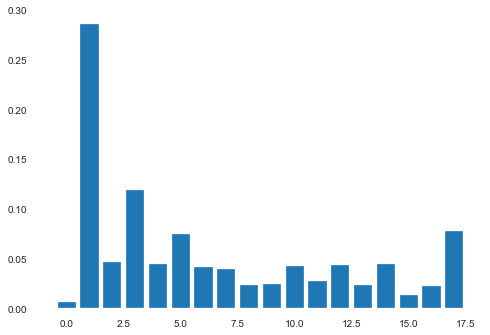

In [411]:
# decision tree for feature importance on a regression problem
from sklearn.datasets import make_regression
#from sklearn.tree import DecisionTreeRegressor
from matplotlib import pyplot
# define dataset
#X, y = make_regression(n_samples=1000, n_features=10, n_informative=5, random_state=1)
# define the model
#model = DecisionTreeRegressor()
# fit the model
#model.fit(X, y)
# get importance
importance = decision_tree.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

In [412]:
pesos = pd.DataFrame(importance)
pesos.head()

,0
0,0.006664
1,0.286108
2,0.046311
3,0.118451
4,0.044926


In [413]:
pesos = pesos.rename(columns={0: 'pesos'}, index={0:'CriterioConfirmacao', 1:'FaixaEtária', 2:'Sexo', 3:'RacaCor', 4:'Febre', 5:'DificuldadeRespiratoria', 6:'Tosse', 7:'Coriza', 8:'DorGarganta', 9:'Diarreia', 10:'Cefaleia', 11:'ComorbidadePulmao', 12:'ComorbidadeCardio', 13:'ComorbidadeRenal', 14:'ComorbidadeDiabetes', 15:'ComorbidadeTabagismo', 16:'ComorbidadeObesidade', 17:'FicouInternado'})
pesos = pesos.reset_index()
pesos = pesos.rename(columns={'index': 'var'})
pesos

,var,pesos
0,CriterioConfirmacao,0.006664
1,FaixaEtária,0.286108
2,Sexo,0.046311
3,RacaCor,0.118451
4,Febre,0.044926
5,DificuldadeRespiratoria,0.074442
6,Tosse,0.041205
7,Coriza,0.039264
8,DorGarganta,0.023700
9,Diarreia,0.023988


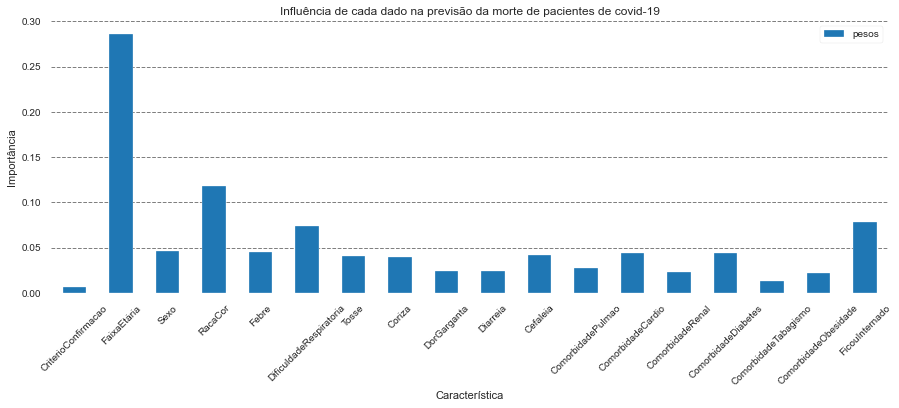

In [414]:
plt.figure(figsize=(15,5))  # Determinando o tamanho do gráfico.
ax = plt.gca()  # Especificando os eixos que serão plotados                                              
plt.title('Influência de cada dado na previsão da morte de pacientes de covid-19')  # Definindo o título do gráfico.            

pesos.plot(kind='bar', x= 'var', ax=ax)  # Plotagem das barras referentes aos números.

#for index, value in enumerate(y):
#   plt.text(value, index, str(value))

plt.ylabel('Importância')  # Nomeando o eixo Y.                                              
plt.xlabel('Característica')  # Nomeando o eixo X.                                             
plt.xticks(rotation=45)  # Rotacionando os nomes dos números abaixo das barras em 45º.                                           
ax.set_axisbelow(True)  # Em conjunto com o comando abaixo, projeta linhas tracejadas sobre o gráfico.
ax.yaxis.grid(color='gray', linestyle='dashed') 

## **3 - Analisando o resultado da predição com dados mais recentes**

In [7]:
#df1 = pd.read_csv('MICRODADOS (2).csv', error_bad_lines=False, sep=';', encoding='latin-1')  # lê o arquivo csv
#df1 = df1.drop(df1[df1.Municipio != 'SAO MATEUS'].index) 
#df1 = df1.drop(df1[df1.Evolucao != 'Óbito pelo COVID-19'].index) 
#df1.Evolucao.value_counts()
#df1.head(10)
#df1.Bairro.value_counts()

#### **3.1 Acompanhamento das pessoas previstas como evolução a óbito**

In [8]:
dfc = df1.drop(df1[df1.Municipio != 'SAO MATEUS'].index) 

# Primeiro modelo
dfc1 = dfc[(dfc.Bairro == 'MORADA DO RIBEIRÃO') & (dfc.FaixaEtaria == '80 a 89 anos') & (dfc.Sexo == 'F') & (dfc.RacaCor == 'Amarela') & (dfc.Data == '2020-05-22')] #acerto
dfc2 = dfc[(dfc.Bairro == 'FÁTIMA') & (dfc.FaixaEtaria == '80 a 89 anos') & (dfc.Sexo == 'M') & (dfc.RacaCor == 'Ignorado') & (dfc.Data == '2020-05-21')]            #erro
dfc3 = dfc[(dfc.Bairro == 'SEAC') & (dfc.FaixaEtaria == '60 a 69 anos') & (dfc.Sexo == 'M') & (dfc.RacaCor == 'Ignorado') & (dfc.Data == '2020-05-27')]              #erro
dfc4 = dfc[(dfc.Bairro == 'RIBEIRÃO') & (dfc.FaixaEtaria == '60 a 69 anos') & (dfc.Sexo == 'M') & (dfc.RacaCor == 'Preta') & (dfc.Data == '2020-05-24')]             #
dfc5 = dfc[(dfc.Bairro == 'SEAC') & (dfc.FaixaEtaria == '50 a 59 anos') & (dfc.Sexo == 'F') & (dfc.RacaCor == 'Parda') & (dfc.Data == '2020-05-25')]                 #erro

# Segundo modelo
dfc6 = dfc[(dfc.Bairro == 'NOVA LIMA') & (dfc.FaixaEtaria == '70 a 79 anos') & (dfc.Sexo == 'F') & (dfc.RacaCor == 'Parda') & (dfc.Data == '2020-05-29')]            #
dfc7 = dfc[(dfc.Bairro == 'GURIRI') & (dfc.FaixaEtaria == '80 a 89 anos') & (dfc.Sexo == 'M') & (dfc.RacaCor == 'Branca') & (dfc.Data == '2020-05-27')]              #
dfc8 = dfc[(dfc.Bairro == 'RIBEIRÃO') & (dfc.FaixaEtaria == '60 a 69 anos') & (dfc.Sexo == 'M') & (dfc.RacaCor == 'Preta') & (dfc.Data == '2020-05-24')]             #

dfcr = pd.concat([dfc1, dfc2, dfc3, dfc4, dfc5, dfc6, dfc7, dfc8])

dfcr.head(10)

,Data,Classificacao,Evolucao,CriterioConfirmacao,StatusNotificacao,Municipio,Bairro,FaixaEtaria,Sexo,RacaCor,Escolaridade,Febre,DificuldadeRespiratoria,Tosse,Coriza,DorGarganta,Diarreia,Cefaleia,ComorbidadePulmao,ComorbidadeCardio,ComorbidadeRenal,ComorbidadeDiabetes,ComorbidadeTabagismo,ComorbidadeObesidade,FicouInternado,ViagemBrasil,ViagemInternacional
19314,2020-05-22,Confirmados,Óbito pelo COVID-19,Laboratorial,Encerrado,SAO MATEUS,MORADA DO RIBEIRÃO,80 a 89 anos,F,Amarela,Ignorado,Não,Sim,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,Sim,Não,-
14885,2020-05-21,Confirmados,Cura,Laboratorial,Encerrado,SAO MATEUS,FÁTIMA,80 a 89 anos,M,Ignorado,Ignorado,Sim,Não,Sim,Não,Não,Não,Não,Não,Sim,Não,Não,Não,Não,Sim,Não,Não
14864,2020-05-27,Confirmados,Cura,Laboratorial,Encerrado,SAO MATEUS,SEAC,60 a 69 anos,M,Ignorado,Ignorado,Sim,Sim,Sim,Não,Não,Não,Não,Não,Sim,Não,Sim,Não,Não,Sim,Não,-
12220,2020-05-24,Confirmados,-,Laboratorial,Em Aberto,SAO MATEUS,RIBEIRÃO,60 a 69 anos,M,Preta,Educação superior completa,Sim,Não,Sim,Não,Sim,Não,Sim,Sim,Sim,Não,Não,Não,Não,Sim,Não,-
8347,2020-05-25,Confirmados,Cura,Laboratorial,Encerrado,SAO MATEUS,SEAC,50 a 59 anos,F,Parda,Ensino médio completo (antigo colegial ou 2º g...,Não,Sim,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,Sim,Não,-
1446,2020-05-29,Confirmados,-,Laboratorial,Em Aberto,SAO MATEUS,NOVA LIMA,70 a 79 anos,F,Parda,4ª série completa do EF (antigo primário ou 1º...,Sim,Sim,Sim,Sim,Não,Não,Sim,Não,Sim,Não,Sim,Não,Não,Sim,Não,Não
5305,2020-05-27,Confirmados,-,Laboratorial,Em Aberto,SAO MATEUS,GURIRI,80 a 89 anos,M,Branca,Ensino médio completo (antigo colegial ou 2º g...,Sim,Não,Não,Sim,Não,Não,Não,Não,Não,Não,Não,Não,Não,-,Não,Não
12220,2020-05-24,Confirmados,-,Laboratorial,Em Aberto,SAO MATEUS,RIBEIRÃO,60 a 69 anos,M,Preta,Educação superior completa,Sim,Não,Sim,Não,Sim,Não,Sim,Sim,Sim,Não,Não,Não,Não,Sim,Não,-


Até a data 09/07/2020 o modelo havia previsto e acertado uma morte e errado 3 pacientes que foram curados. Outros 4 pacientes permanecem em acompanhamento pelo modelo.

#### **3.2 Pessoas que foram a óbito antes do modelo ser aplicado**

In [9]:
dfmm = df1.drop(df1[df1.Municipio != 'SAO MATEUS'].index) 
dfmm = dfmm.drop(dfmm[dfmm.Evolucao != 'Óbito pelo COVID-19'].index) 
dfmm

,Data,Classificacao,Evolucao,CriterioConfirmacao,StatusNotificacao,Municipio,Bairro,FaixaEtaria,Sexo,RacaCor,Escolaridade,Febre,DificuldadeRespiratoria,Tosse,Coriza,DorGarganta,Diarreia,Cefaleia,ComorbidadePulmao,ComorbidadeCardio,ComorbidadeRenal,ComorbidadeDiabetes,ComorbidadeTabagismo,ComorbidadeObesidade,FicouInternado,ViagemBrasil,ViagemInternacional
122,2020-05-06,Confirmados,Óbito pelo COVID-19,Laboratorial,Encerrado,SAO MATEUS,BOA VISTA,80 a 89 anos,F,Preta,Analfabeto,Não,Sim,Sim,Não,Não,Não,Não,Não,Sim,Não,Sim,Não,Não,Sim,Não,Não
3829,2020-05-08,Confirmados,Óbito pelo COVID-19,Laboratorial,Encerrado,SAO MATEUS,UNIVERSITÁRIO,70 a 79 anos,F,Parda,Ensino médio incompleto (antigo colegial ou 2º...,Sim,Sim,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,Sim,Não,Não
14857,2020-05-26,Confirmados,Óbito pelo COVID-19,Laboratorial,Encerrado,SAO MATEUS,LITORÂNEO,80 a 89 anos,M,Ignorado,Ignorado,Não,Não,Sim,Não,Não,Não,Não,Não,Sim,Não,Não,Sim,Não,Sim,Não,Não
14887,2020-06-08,Confirmados,Óbito pelo COVID-19,Laboratorial,Encerrado,SAO MATEUS,VITÓRIA,50 a 59 anos,F,Ignorado,Ignorado,Não,Sim,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,Sim,-,-
14890,2020-03-26,Confirmados,Óbito pelo COVID-19,Laboratorial,Encerrado,SAO MATEUS,RESIDENCIAL PARQUE WASHIGTON,30 a 39 anos,M,Ignorado,Ignorado,Sim,Sim,Não,Não,Não,Não,Sim,-,-,-,-,-,Sim,Sim,Não,Não
19314,2020-05-22,Confirmados,Óbito pelo COVID-19,Laboratorial,Encerrado,SAO MATEUS,MORADA DO RIBEIRÃO,80 a 89 anos,F,Amarela,Ignorado,Não,Sim,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,Sim,Não,-
